In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/raw_data/StudentsPerformance.csv')

In [ ]:
data.info('/content/raw_data/StudentsPerformance.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
# find the null values
null_counts = data.isnull().sum()
print(null_counts)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [ ]:
data['average score'] = (data['math score'] + data['writing score'] + data['reading score'])/3
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [ ]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'average score'],
      dtype='object')

In [ ]:
data['average score'] = np.round(data['average score'], 2)

In [ ]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00
996,male,group C,high school,free/reduced,none,62,55,55,57.33
997,female,group C,high school,free/reduced,completed,59,71,65,65.00
998,female,group D,some college,standard,completed,68,78,77,74.33


In [10]:
#Save the data into Clean data folder
data.to_csv("/content/clean_data/CleanData_Student_Performance.csv")

# **Data Visualation**

### **1. Bar Plot of Race or Ethnicity with count at the top**

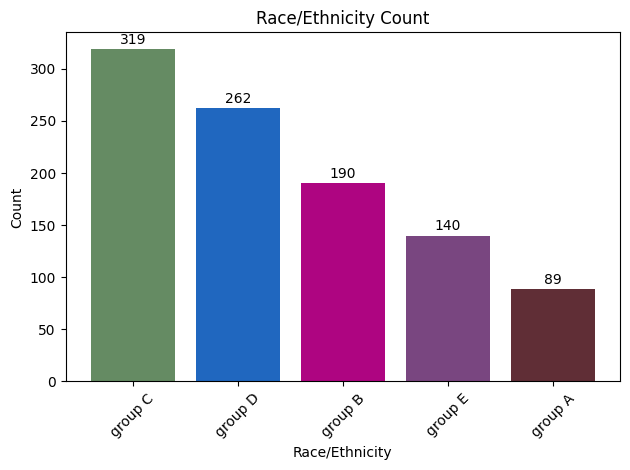

In [27]:

# Assuming 'data' is your DataFrame containing the data
# Replace 'data' with your actual DataFrame name
custom_palette = ["#658b63", "#2067bf", "#ae0581", "#794680", "#602e36"]
race_counts = data['race/ethnicity'].value_counts()

plt.bar(race_counts.index, race_counts, color=custom_palette)

# Add count labels on top of each bar
for i, count in enumerate(race_counts):
    plt.text(i, count + 5, str(count), ha='center')

plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.title('Race/Ethnicity Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('/content/results/Race_Ethnicity_Count_Matplotlib_plot.jpg')
plt.show()


### **2. Bar Plot of Gender Distribution with count at the top**

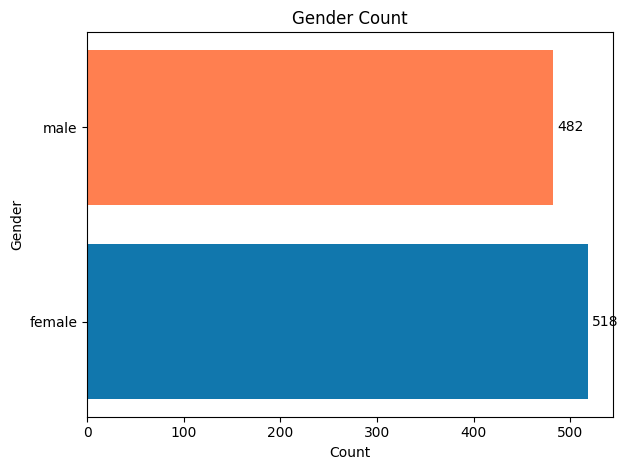

In [28]:


# Assuming 'data' is your DataFrame containing the data
# Replace 'data' with your actual DataFrame name
custom_palette = ["#1177ad", "#ff7f50"]
gender_counts = data['gender'].value_counts()

plt.barh(gender_counts.index, gender_counts, color=custom_palette)

# Add count labels beside each bar
for index, value in enumerate(gender_counts):
    plt.text(value + 5, index, str(value), va='center')

plt.ylabel('Gender')
plt.xlabel('Count')
plt.title('Gender Count')
plt.tight_layout()

plt.savefig('/content/results/Gender_Count_Horizontal_Matplotlib_plot.jpg')
plt.show()


### **3. Line Plot of Average Score VS Math, Writing & Reading Score**

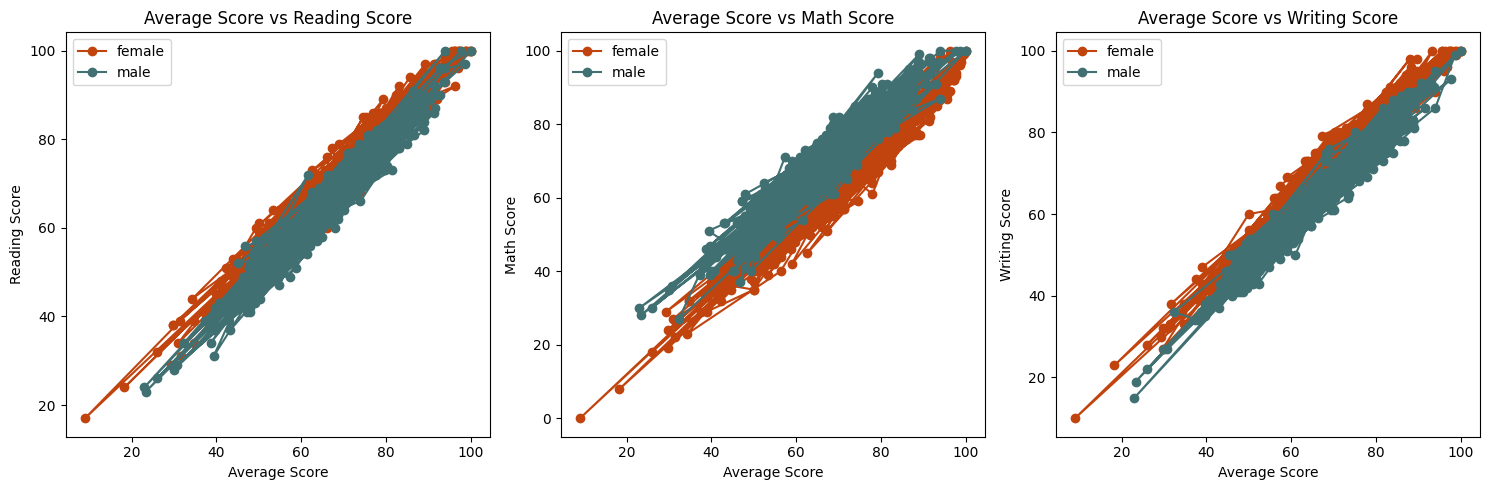

In [29]:


# Assuming 'data' is your DataFrame containing the data
# Replace 'data' with your actual DataFrame name
custom_palette = ["#c1440e", "#407072"]

plt.figure(figsize=(15, 5))

# Line plot: Average score vs Reading score
plt.subplot(1, 3, 1)
for gender, color in zip(data['gender'].unique(), custom_palette):
    subset = data[data['gender'] == gender]
    plt.plot(subset['average score'], subset['reading score'], marker='o', linestyle='-', color=color, label=gender)
plt.xlabel("Average Score")
plt.ylabel("Reading Score")
plt.title("Average Score vs Reading Score")
plt.legend()

# Line plot: Average score vs Math score
plt.subplot(1, 3, 2)
for gender, color in zip(data['gender'].unique(), custom_palette):
    subset = data[data['gender'] == gender]
    plt.plot(subset['average score'], subset['math score'], marker='o', linestyle='-', color=color, label=gender)
plt.xlabel("Average Score")
plt.ylabel("Math Score")
plt.title("Average Score vs Math Score")
plt.legend()

# Line plot: Average score vs Writing score
plt.subplot(1, 3, 3)
for gender, color in zip(data['gender'].unique(), custom_palette):
    subset = data[data['gender'] == gender]
    plt.plot(subset['average score'], subset['writing score'], marker='o', linestyle='-', color=color, label=gender)
plt.xlabel("Average Score")
plt.ylabel("Writing Score")
plt.title("Average Score vs Writing Score")
plt.legend()

plt.tight_layout()

plt.savefig('/content/results/Avg_vs_RS_MS_WS_Lineplot.jpg')
plt.show()


### **4. Bar Plot of Gender vs Average Score**

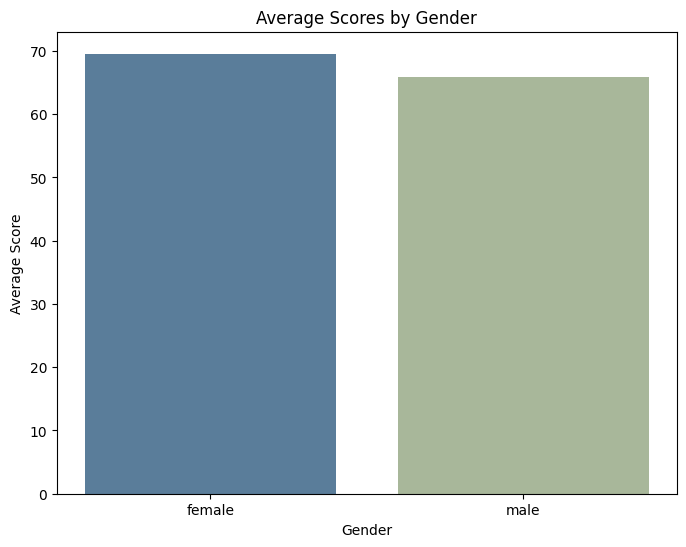

In [30]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the data
# Replace 'data' with your actual DataFrame name
custom_palette = ['#5a7d9a', '#a8b79a']

plt.figure(figsize=(8, 6))

# Bar plot: Average Scores by Gender
gender_means = data.groupby('gender')['average score'].mean()
plt.bar(gender_means.index, gender_means, color=custom_palette)

plt.title('Average Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')

plt.savefig('/content/results/Avg_score_by_gender_Barplot.jpg')
plt.show()


### **5. Bar Plot of Lunch-type**

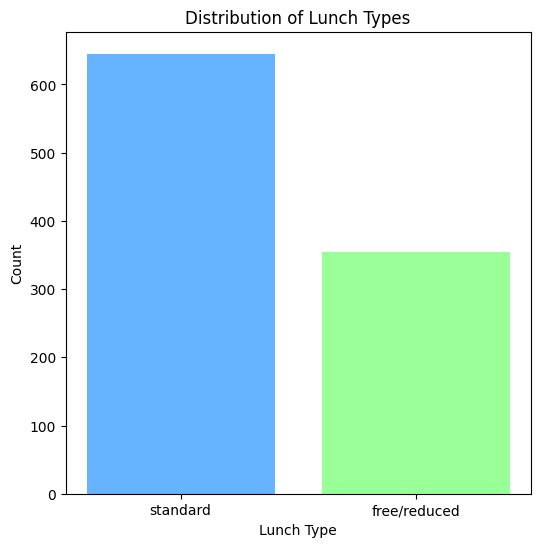

In [31]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the data
# Replace 'data' with your actual DataFrame name

# Count the number of occurrences of each lunch type
lunch_counts = data['lunch'].value_counts()

# Plotting a bar chart
plt.figure(figsize=(6, 6))
plt.bar(lunch_counts.index, lunch_counts, color=['#66b3ff', '#99ff99'])
plt.xlabel('Lunch Type')
plt.ylabel('Count')
plt.title('Distribution of Lunch Types')

plt.savefig('/content/results/Lunch_type_distribution_Barplot.jpg')
plt.show()
